<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Univariate_Regression_On_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
startups=pd.read_csv('/content/drive/MyDrive/FML/50_Startups.csv')

In [23]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [25]:
X=startups['R&D Spend'].values
y=startups['Profit'].values

In [26]:
X.shape,y.shape

((50,), (50,))

In [27]:
X=X.reshape(-1,1)
X.shape

(50, 1)

In [28]:
y=y.reshape(-1,1)
y.shape

(50, 1)

In [29]:
X.shape,y.shape

((50, 1), (50, 1))

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

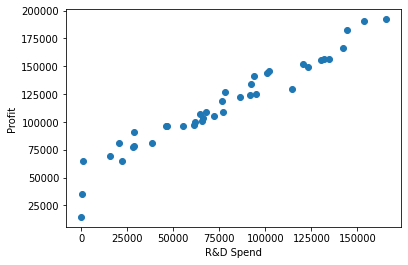

In [31]:
plt.scatter(X_train,y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict=reg.predict(X_train)
mae=mean_absolute_error(y_train,y_predict)
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mean_squared_error(y_train,y_predict))
rs=r2_score(y_train,y_predict)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  7277.952864970808
mse  91868860.31493357
rmse  9584.824480131787
rs  0.9401069074040476


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict_test=reg.predict(X_test)
mae=mean_absolute_error(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))
rs=r2_score(y_test,y_predict_test)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  5893.693939890119
mse  62317021.653043605
rmse  7894.11310110538
rs  0.9622927671801862


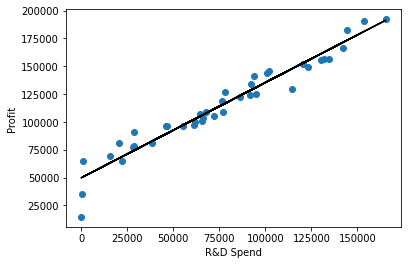

In [36]:
plt.scatter(X_train,y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.plot(X_train,y_predict,color='black')
plt.show()